# Exploratory Data Analysis Exercise with Pandas and HoloViews

In this exercise, you will use the data used in the MatplotLib exercise but explore the data interactively using the HoloViews plotting library. Filepath for the data:

    files -> Data -> NWIS_Streaflow -> <STATE>

After performing data cleaning and time-series alignment with Pandas (you can copy the  code used in the Matplotlib exercise), you will transition develop interactaive HoloViews visualizations. The core of the assignment emphasizes the HoloViews philosophy and leveraging the Matplotlib backend, encouring interactive exploratory data analysis to link, overlay, and explore discharge trends across Idaho, Utah, and Wyoming. 

The [USGS NWIS Mapper](https://apps.usgs.gov/nwismapper/) provides interactive mapping to locate sites and repective metadata.

## Task 1: Select, download, and bring the data into your notebook session (this can be copied from your Matplotlib exercise, and add a few more sites)

Use the [USGS NWIS Mapper](https://apps.usgs.gov/nwismapper/) to locate one site below a reservoir,  one site in a headwater catchment, and one site near a rivers terminus to the Great Salt Lake. In addition to these locations, ensure you have at least **2 sites in Idaho, 2 sites in Wyoming, and 2 sites in Utah.** Make a **data** directory in the getting_started folder create state folders for the data (e.g., UT, WY, ID). Drag and drop your data into these folders.

In the code block below, load the data into a Pandas DataFrame and inspect it as we previously did in the Pandas exercises (.head(), .describe()). Write down what you notice. Remove any outliers NaN values, and -999.



In [5]:
from pathlib import Path

base = Path("data")

print("BASE:", base.resolve())
print("Folders inside data:", list(base.iterdir()))

files = list(base.glob("*/*.csv"))

print("CSV files found:", len(files))
files[:5]

BASE: /uufs/chpc.utah.edu/common/home/u1257442/CommunicatingData-Plotting/Holoviews/getting_started/data
Folders inside data: [PosixPath('data/Idaho'), PosixPath('data/Utah'), PosixPath('data/Wyoming')]
CSV files found: 6


[PosixPath('data/Idaho/10039500_1980_2020.csv'),
 PosixPath('data/Idaho/10068500_1980_2020.csv'),
 PosixPath('data/Utah/09217900_1980_2020.csv'),
 PosixPath('data/Utah/09261000_1980_2020.csv'),
 PosixPath('data/Wyoming/06191000_1980_2020.csv')]

In [7]:
df = pd.read_csv("data/Idaho/10039500_1980_2020.csv")

df.head()
df.describe()

,USGS_flow,USGS_ID,series
count,8432.000000,12418.0,12418.0
mean,433.651842,10039500.0,0.0
std,552.744622,0.0,0.0
min,29.458334,10039500.0,0.0
25%,134.888020,10039500.0,0.0
50%,226.947915,10039500.0,0.0
75%,450.401040,10039500.0,0.0
max,3852.061800,10039500.0,0.0


In [9]:
df = df.replace(-999, np.nan)
df = df.dropna(subset=["USGS_flow"])

## Task 2: Creating a Tabular dataset.

Create a single dataframe named All_Streams and combine all streamflow monitoring data into this dataframe. Your dataset should look like the diseases dataset in [2-Customization.ipynb](./2-Customization.ipynb). Hint, the following columns should be present:USGS_flow, variable, USGS_ID, year month, day,s tate (Idaho, Utah, Wyoming), and streamflow_class (e.g., headwater, below reservoir, GSL Terminus)

Check to see that everything worked by running the .unique() function on the USGS_ID column, making sure all sites are present.


In [11]:
from pathlib import Path

files = list(Path("data").glob("*/*.csv"))

dfs = []

for f in files:
    df = pd.read_csv(f)

    # clean
    df["USGS_flow"] = pd.to_numeric(df["USGS_flow"], errors="coerce")
    df = df.replace(-999, np.nan)
    df = df.dropna(subset=["USGS_flow"])

    # parse date
    df["Datetime"] = pd.to_datetime(df["Datetime"])

    # add required fields
    df["USGS_ID"] = f.stem.split("_")[0]

    if "Idaho" in str(f):
        df["state"] = "Idaho"
    elif "Utah" in str(f):
        df["state"] = "Utah"
    else:
        df["state"] = "Wyoming"

    # class (set these 6 manually)
    stream_class = {
        "10039500": "headwater",
        "10068500": "below reservoir",
        "09217900": "below reservoir",
        "09261000": "GSL terminus",
        "06191000": "headwater",
        "06289000": "below reservoir",
    }
    df["streamflow_class"] = stream_class.get(df["USGS_ID"].iloc[0], "unknown")

    df["variable"] = "discharge"

    df["year"] = df["Datetime"].dt.year
    df["month"] = df["Datetime"].dt.month
    df["day"] = df["Datetime"].dt.day

    keep = ["USGS_flow","variable","USGS_ID","year","month","day","state","streamflow_class","Datetime"]
    dfs.append(df[keep])

All_Streams = pd.concat(dfs, ignore_index=True)

All_Streams["USGS_ID"].unique()

array(['10039500', '10068500', '09217900', '09261000', '06191000',
       '06289000'], dtype=object)

## Task 3: Make an HoloViews Curve Plot for each state

Use the hv.Curve function to plot the streamflow for each state. Set the kdims to Datetime and the vdims to USGS_flow. combine into a layout and print

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
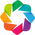

:Layout
   .Overlay.Idaho   :Overlay
      .Curve.A_10039500 :Curve   [Datetime]   (USGS_flow)
      .Curve.A_10068500 :Curve   [Datetime]   (USGS_flow)
   .Overlay.Utah    :Overlay
      .Curve.A_09217900 :Curve   [Datetime]   (USGS_flow)
      .Curve.A_09261000 :Curve   [Datetime]   (USGS_flow)
   .Overlay.Wyoming :Overlay
      .Curve.A_06191000 :Curve   [Datetime]   (USGS_flow)
      .Curve.A_06289000 :Curve   [Datetime]   (USGS_flow)

In [12]:
hv.extension("bokeh")

def plot_state(state_name):
    d = All_Streams[All_Streams["state"] == state_name].copy()
    d = d.sort_values("Datetime")

    curves = []
    for site in sorted(d["USGS_ID"].unique()):
        sd = d[d["USGS_ID"] == site]
        curves.append(hv.Curve(sd, "Datetime", "USGS_flow", label=str(site)))

    return hv.Overlay(curves).relabel(state_name)

layout = plot_state("Idaho") + plot_state("Utah") + plot_state("Wyoming")
layout

## Task 4 Add functionality

To the existing plot, change the line color to red and add a hover tool. Stack the plots as rows

In [13]:
layout = (plot_state("Idaho") +
          plot_state("Utah") +
          plot_state("Wyoming")).cols(1)

layout.opts(
    opts.Curve(color="red", tools=["hover"]),
    opts.Overlay(legend_position="right")
)

:Layout
   .Overlay.Idaho   :Overlay
      .Curve.A_10039500 :Curve   [Datetime]   (USGS_flow)
      .Curve.A_10068500 :Curve   [Datetime]   (USGS_flow)
   .Overlay.Utah    :Overlay
      .Curve.A_09217900 :Curve   [Datetime]   (USGS_flow)
      .Curve.A_09261000 :Curve   [Datetime]   (USGS_flow)
   .Overlay.Wyoming :Overlay
      .Curve.A_06191000 :Curve   [Datetime]   (USGS_flow)
      .Curve.A_06289000 :Curve   [Datetime]   (USGS_flow)